In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 代入数据

In [3]:
filepath = "../data/trajectories(table 5)_training.csv"

In [4]:
raw_data = pd.read_csv(filepath)

In [5]:
raw_data

,intersection_id,tollgate_id,vehicle_id,starting_time,travel_seq,travel_time
0,B,3,1065642,2016-07-19 00:14:24,105#2016-07-19 00:14:24#9.56;100#2016-07-19 00...,70.85
1,B,3,1047198,2016-07-19 00:35:56,105#2016-07-19 00:35:56#11.58;100#2016-07-19 0...,148.79
2,B,1,1086390,2016-07-19 00:37:15,105#2016-07-19 00:37:15#5.26;100#2016-07-19 00...,79.76
3,A,2,1071181,2016-07-19 00:37:59,110#2016-07-19 00:37:59#13.74;123#2016-07-19 0...,58.05
4,B,1,1065807,2016-07-19 00:56:21,105#2016-07-19 00:56:21#16.08;100#2016-07-19 0...,137.98
5,C,3,1072812,2016-07-19 00:56:31,115#2016-07-19 00:56:31#10.97;102#2016-07-19 0...,113.54
6,B,1,1014648,2016-07-19 01:26:03,105#2016-07-19 01:26:03#16.85;100#2016-07-19 0...,176.70
7,A,2,1063919,2016-07-19 01:36:04,110#2016-07-19 01:36:04#10.39;123#2016-07-19 0...,74.47
8,A,3,1064408,2016-07-19 01:36:20,110#2016-07-19 01:36:20#8.58;123#2016-07-19 01...,94.57
9,C,1,1056529,2016-07-19 01:36:28,115#2016-07-19 01:36:28#9.50;102#2016-07-19 01...,214.87


# 各种统计

## (1)

统计不同路段内 travel_time的均值、标准差、最大值、最小值、中位数

In [8]:
groups_1 = raw_data.loc[:,['intersection_id', 'travel_time']].groupby('intersection_id')

In [13]:
# 均值
groups_1.mean()

,travel_time
intersection_id,
A,87.866206
B,117.842327
C,185.383636


In [14]:
# 标准差
groups_1.std()

,travel_time
intersection_id,
A,65.745228
B,55.418446
C,73.097123


In [15]:
# 最大值
groups_1.max()

,travel_time
intersection_id,
A,6711.11
B,1627.38
C,2489.57


In [16]:
# 最小值
groups_1.min()

,travel_time
intersection_id,
A,9.26
B,11.74
C,32.04


In [17]:
# 中位数
groups_1.median()

,travel_time
intersection_id,
A,76.125
B,110.380
C,173.120


## (2)

一天按照24小时，统计不同小时内travel_time的均值、标准差、最大值、最小值、中位数



In [18]:
def get_hour(s):
    words = s['starting_time'].split(' ')
    times = words[1].split(':')
    return times[0].strip()

In [19]:
raw_data['hour'] = raw_data.apply(lambda s : get_hour(s), axis=1)

In [20]:
# 已完成按日期分组
groups_2 = raw_data.loc[:,['hour', 'travel_time']].groupby('hour')

In [22]:
# 均值
groups_2.mean()

,travel_time
hour,
00,92.932702
01,91.950943
02,85.787205
03,86.777088
04,84.997217
05,81.157873
06,95.988308
07,102.283863
08,113.555675


In [23]:
# 标准差
groups_2.std()

,travel_time
hour,
00,57.258304
01,65.586241
02,53.835262
03,70.405263
04,74.383341
05,66.436411
06,72.219123
07,63.006477
08,73.396448


In [24]:
# 最大值
groups_2.max()

,travel_time
hour,
00,566.33
01,760.82
02,480.42
03,804.61
04,1218.06
05,1501.33
06,1627.38
07,985.88
08,2058.93


In [25]:
# 最小值
groups_2.min()

,travel_time
hour,
00,13.51
01,9.32
02,9.37
03,11.00
04,10.60
05,9.43
06,9.27
07,9.29
08,9.46


In [27]:
# 中位数
groups_2.median()

,travel_time
hour,
00,79.610
01,73.740
02,72.180
03,70.640
04,67.280
05,64.925
06,83.200
07,89.670
08,100.320


## (3)

统计不同路段不同小时内travel_time的均值、标准差、最大值、最小值、中位数

In [28]:
groups_3 = raw_data.loc[:,['intersection_id','hour', 'travel_time']].groupby(['intersection_id', 'hour'])

In [30]:
# 均值
groups_3.mean()

travel_time
intersection_id hour             
A               00      74.086459
                01      71.586378
                02      70.047661
                03      72.671881
                04      75.264677
                05      67.366761
                06      78.180258
                07      89.357389
                08     103.202959
                09     105.527882
                10      93.020313
                11      81.809833
                12      80.126671
                13      82.199424
                14      86.871212
                15      86.898493
                16      88.930645
                17      91.879717
                18      89.482096
                19      90.142688
                20      80.409063
                21      85.179684
                22      75.142450
                23      75.373815
B               00     105.527962
                01     114.208588
                02     106.349007
                03     109.148797
                04     100.829588
                05      96.436094
...                           ...
                18     122.130620
                19     120.137271
                20     116.328868
                21     109.122303
                22     101.723215
                23     105.869224
C               00     167.736475
                01     176.945897
                02     166.431091
                03     187.771250
                04     164.666964
                05     169.146549
                06     164.029211
                07     172.678875
                08     173.035464
                09     182.907215
                10     181.153996
                11     175.822854
                12     177.146360
                13     182.204870
                14     192.686956
                15     190.253175
                16     190.745644
                17     197.565256
                18     208.487337
                19     208.229041
                20     196.349429
                21     200.486632
                22     179.281560
                23     177.595563

[72 rows x 1 columns]

In [31]:
# 标准差
groups_3.std().head()

travel_time
intersection_id hour             
A               00      47.899100
                01      42.199566
                02      43.444515
                03      63.067049
                04      77.999920

In [32]:
# 最大值
groups_3.max().head()

travel_time
intersection_id hour             
A               00         459.50
                01         393.59
                02         441.45
                03         804.61
                04        1218.06

In [33]:
# 最小值
groups_3.min().head()

travel_time
intersection_id hour             
A               00          13.51
                01           9.32
                02           9.37
                03          11.00
                04          10.60

In [34]:
# 中位数
groups_3.median().head()

travel_time
intersection_id hour             
A               00         63.135
                01         61.850
                02         58.435
                03         55.750
                04         57.485

## (4)

可视化一天内，按照每小时统计的车流量、通行时间图

### 车流量可视化

In [43]:
data_1 = raw_data.groupby('hour').count().iloc[:,0]

Text(0.5,1,'traffic flow in hour')

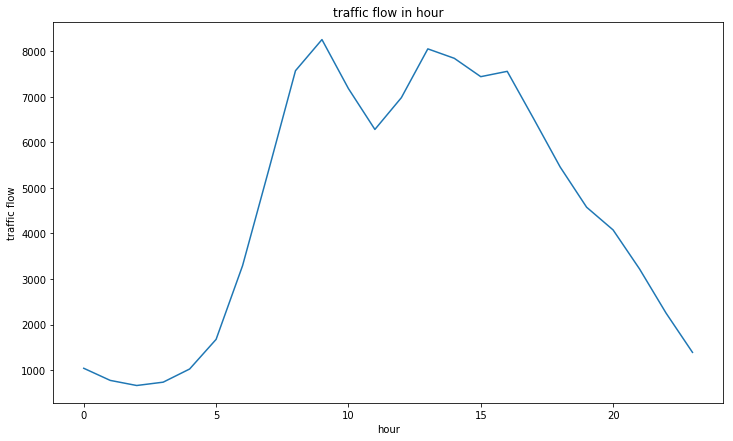

In [56]:
plt.figure(figsize=(12,7))
xs = range(24)
ys = data_1.values
plt.plot(xs, ys)
plt.xlabel('hour')
plt.ylabel('traffic flow')
plt.title('traffic flow in hour')

### 通行时间可视化

In [46]:
data_2 = raw_data.loc[:,['hour','travel_time']].groupby('hour').mean()

Text(0.5,1,' mean travel time in hour ')

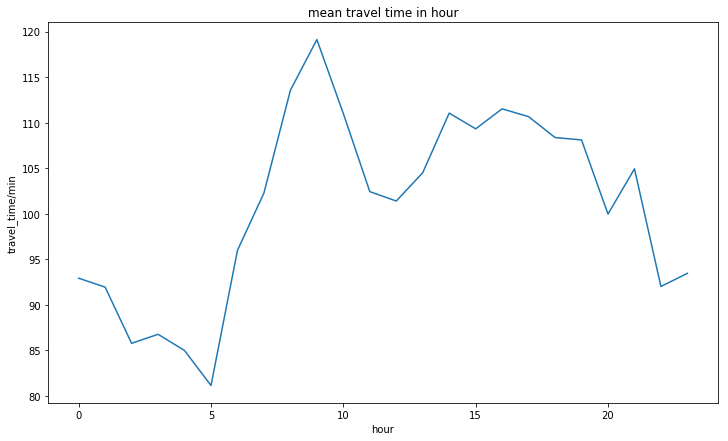

In [55]:
plt.figure(figsize=(12,7))
xs = range(24)
ys = data_2['travel_time']
plt.plot(xs, ys)
plt.xlabel('hour')
plt.ylabel('travel_time/min')
plt.title(' mean travel time in hour ')

# 总结数据特点

1. 本份数据说明了，三个路口上每一辆车的进入时间与通行时间
2. 在车流量上，从图1中可以很明显地看出，在从早晨5点开始车流量渐渐变大，在约8点时达到顶峰，8点至13点之间会有一个低谷，在13点左右车流量又会达到一个顶峰，此后随着时间推移，越晚车流量越少
3. 在每一辆车的通行时间上，从图2中可以看出，在早上8~9点时每一辆车的平均通行时间达到一天顶峰，通行时间在一天内的不均匀，这说明了那一条路当时很可能很容易堵车，并且通行时间很容易受到车流量的影响